# Importing some libraries for our operations.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={"figure.figsize":(13,10)})

# Reading dataset using read_csv() function which is in pandas library.

In [129]:
df = pd.read_csv("diamonds.csv")

In [130]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Understanding the data dictionary
- first column "Unnamed:0" is just as the index type so we can drop this column.
- Continous type variable
  - carat weight of the diamond
  - x length in mm (0--10.74)
  - y width in mm (0--58.9)
  - z depth in mm (0--31.8)
  - depth total depth percentage = z / mean(x, y)
  - table width of top of diamond relative to widest point (43--95)
- Categorical type variable
  - cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
  - color diamond colour, from J (worst) to D (best)
  - clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 


In [132]:
df.price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

### Sanity testing is performed to ensure that the code changes that are made are working as properly.

In [133]:
df.drop(["Unnamed: 0"] , axis="columns" , inplace=True)

In [134]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [135]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [136]:
df.describe().T   #To check the statistical data

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [137]:
df.shape

(53940, 10)

### checking for unique values ​​of each categorical variable.(cut,clarity and color)

In [138]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [139]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [140]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [141]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [142]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Exploratory Data Analysis(EDA): 
## EDA  is used to perform analysis using the proporties of the dataset.
  
  Numerical Analysis ( Target variable vs remaing continous variables):

In [143]:
cont = ['price' , 'carat', 'depth' , 'table' , 'x' , 'y' , 'z']
cat  = ['cut' , 'color' , 'clarity']

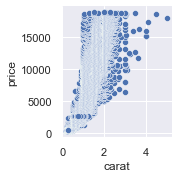

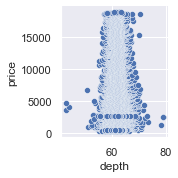

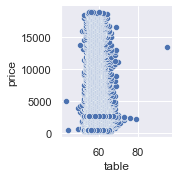

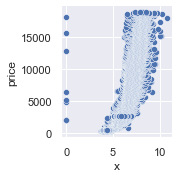

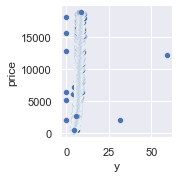

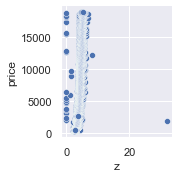

In [144]:
for col in cont[1:]:
    sns.pairplot(data = df , x_vars = col , y_vars = 'price' , diag_kind=None )

## There is a good linear relationship between the x, y, z, carat and price variables

### To find the correlation between the numerical variables we will use heatmap.

<AxesSubplot:>

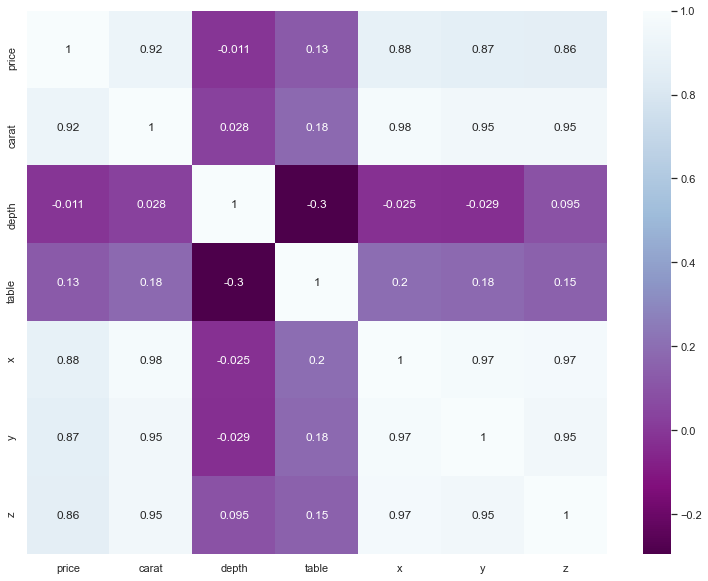

In [145]:
sns.heatmap(df[cont].corr() , annot=True , cmap = 'BuPu_r')

- "x" - "y" correlation -> 0.97. (strongest correlation)
- "price" -"carat" correlation ->  0.92 (good correlation)
- "table" - "price" -> 0.13 (poor correlation)
- "depth" - "y" correlation -> -0.029 (weakest corelation)

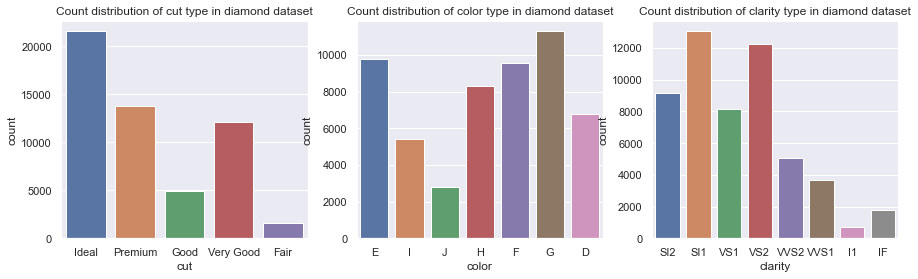

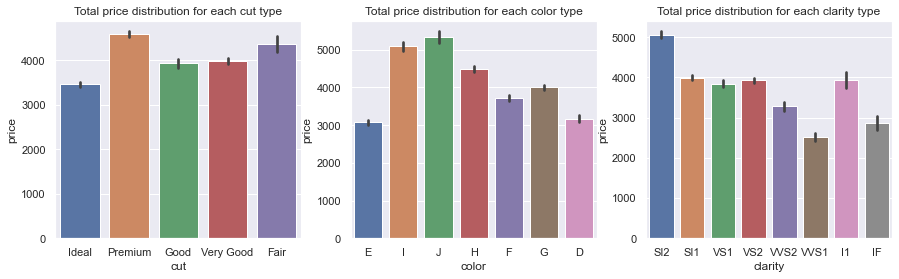

In [146]:
fig = plt.figure(figsize=(15,4))
    
for i in range(len(cat)):
    fig.add_subplot(1,3,i+1)
    sns.countplot(df[cat[i]])
    plt.title("Count distribution of {} type in diamond dataset".format(cat[i]))
plt.show()

fig = plt.figure(figsize=(15, 4))
for j in range(len(cat)):
    fig.add_subplot(1,3,j+1)
    sns.barplot(x=cat[j], y ="price" , data = df) 
    plt.title("Total price distribution for each {} type".format(cat[j]))
    
plt.show()    

### We use get_dummies() function to convert categorical variable to dummy/indicator variables because many machine learning algorithms do not support string values ​​for input variables.

In [147]:
cut = pd.get_dummies(df["cut"] , drop_first=True)
color = pd.get_dummies(df["color"] , drop_first=True)
clarity = pd.get_dummies(df["clarity"] , drop_first=True)

In [148]:
df1 = df.join([cut , clarity , color ] )

In [149]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,1,0,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,1,0,0,0,1,0,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,0,0,0,0,0,0,0,1


In [150]:
df1.drop(cat ,axis = 1, inplace=True)

In [151]:
df1.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Training The Model

In [152]:
import sklearn 
from sklearn.model_selection import train_test_split

In [153]:
df_train , df_test = train_test_split(df1 , train_size = 0.7 , random_state = 100)

In [154]:
df1.shape

(53940, 24)

In [155]:
df_test.shape

(16182, 24)

In [156]:
df_train.shape

(37758, 24)

In [157]:
df_train[cont].head()

,price,carat,depth,table,x,y,z
29477,702,0.32,61.3,56.0,4.40,4.44,2.71
52542,2532,0.72,61.7,55.0,5.76,5.81,3.57
8725,586,0.38,62.0,55.0,4.67,4.72,2.91
15577,6249,1.00,62.6,56.0,6.36,6.39,3.99
19651,8263,1.70,59.8,61.0,7.67,7.62,4.57


+ Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.Data is scaled from 0 to 1.

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
df_train[cont] = scaler.fit_transform(df_train[cont])

In [160]:
df_train[cont].head()

,price,carat,depth,table,x,y,z
29477,0.020328,0.024948,0.508333,0.250000,0.409683,0.075382,0.336228
52542,0.119263,0.108108,0.519444,0.230769,0.536313,0.098642,0.442928
8725,0.014056,0.037422,0.527778,0.230769,0.434823,0.080136,0.361042
15577,0.320214,0.166320,0.544444,0.250000,0.592179,0.108489,0.495037
19651,0.429097,0.311850,0.466667,0.346154,0.714153,0.129372,0.566998


In [161]:
df_train[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
price,37758.0,0.195826,0.216556,0.0,0.033627,0.112613,0.273450,1.0
carat,37758.0,0.124531,0.098815,0.0,0.041580,0.103950,0.174636,1.0
depth,37758.0,0.520975,0.039930,0.0,0.500000,0.522222,0.541667,1.0
table,37758.0,0.277841,0.042971,0.0,0.250000,0.269231,0.307692,1.0
x,37758.0,0.533830,0.104589,0.0,0.438547,0.530726,0.608939,1.0
y,37758.0,0.097406,0.019621,0.0,0.080136,0.096944,0.111036,1.0
z,37758.0,0.439199,0.086407,0.0,0.361042,0.436725,0.501241,1.0


In [162]:
y_train = df_train["price"]

In [163]:
x_train = df_train.loc[: , df_train.columns != "price"]

In [164]:
y_train.head()

29477    0.020328
52542    0.119263
8725     0.014056
15577    0.320214
19651    0.429097
Name: price, dtype: float64

In [165]:
x_train.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
29477,0.024948,0.508333,0.250000,0.409683,0.075382,0.336228,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
52542,0.108108,0.519444,0.230769,0.536313,0.098642,0.442928,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8725,0.037422,0.527778,0.230769,0.434823,0.080136,0.361042,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15577,0.166320,0.544444,0.250000,0.592179,0.108489,0.495037,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
19651,0.311850,0.466667,0.346154,0.714153,0.129372,0.566998,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Building our model
- Linear Regression (Price is of continous datatype so we should use "Supervised linear regression model")

As the number of independent variables are 23 that is high. Initially we shall use Recursive Feature Elimination.We use RFE as it is easy to configure and use and to predict the target variable in a training dataset and select the features (columns) that are more or most relevant.

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [167]:
lm = LinearRegression()
lm.fit(x_train , y_train)

rfe = RFE(lm,13)
rfe.fit(x_train , y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [168]:
list(zip(x_train.columns , rfe.support_ , rfe.ranking_))

[('carat', True, 1),
 ('depth', True, 1),
 ('table', True, 1),
 ('x', True, 1),
 ('y', False, 2),
 ('z', False, 3),
 ('Good', False, 8),
 ('Ideal', False, 5),
 ('Premium', False, 6),
 ('Very Good', False, 7),
 ('IF', True, 1),
 ('SI1', True, 1),
 ('SI2', True, 1),
 ('VS1', True, 1),
 ('VS2', True, 1),
 ('VVS1', True, 1),
 ('VVS2', True, 1),
 ('E', False, 11),
 ('F', False, 10),
 ('G', False, 9),
 ('H', False, 4),
 ('I', True, 1),
 ('J', True, 1)]

In [169]:
col = x_train.columns[rfe.support_]

In [170]:
col

Index(['carat', 'depth', 'table', 'x', 'IF', 'SI1', 'SI2', 'VS1', 'VS2',
       'VVS1', 'VVS2', 'I', 'J'],
      dtype='object')

In [171]:
x_train.columns[~rfe.support_]

Index(['y', 'z', 'Good', 'Ideal', 'Premium', 'Very Good', 'E', 'F', 'G', 'H'], dtype='object')

### With RFE, we reduced the number of columns for more important features from 23 to 13. (feature selection)

In [172]:
col.size

13

In [173]:
x_train_rfe = x_train[col]

In [174]:
x_train_rfe.head()

,carat,depth,table,x,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,I,J
29477,0.024948,0.508333,0.250000,0.409683,0,0,0,1,0,0,0,0,0
52542,0.108108,0.519444,0.230769,0.536313,0,0,0,0,0,0,1,1,0
8725,0.037422,0.527778,0.230769,0.434823,0,1,0,0,0,0,0,0,0
15577,0.166320,0.544444,0.250000,0.592179,0,0,0,0,0,0,1,0,0
19651,0.311850,0.466667,0.346154,0.714153,0,0,1,0,0,0,0,0,0


- #### statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [175]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe) #adding the fixed value

In [176]:
x_train_rfe.head()

,const,carat,depth,table,x,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,I,J
29477,1.0,0.024948,0.508333,0.250000,0.409683,0,0,0,1,0,0,0,0,0
52542,1.0,0.108108,0.519444,0.230769,0.536313,0,0,0,0,0,0,1,1,0
8725,1.0,0.037422,0.527778,0.230769,0.434823,0,1,0,0,0,0,0,0,0
15577,1.0,0.166320,0.544444,0.250000,0.592179,0,0,0,0,0,0,1,0,0
19651,1.0,0.311850,0.466667,0.346154,0.714153,0,0,1,0,0,0,0,0,0


In [177]:
lm = sm.OLS(y_train , x_train_rfe).fit() #running the linear model

In [178]:
lm.summary() # table of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 3.104e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:40:53   Log-Likelihood:                 50613.
No. Observations:               37758   AIC:                        -1.012e+05
Df Residuals:                   37744   BIC:                        -1.011e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.010     12.701      0.000       0.106       0.145
carat          2.9407      0.016    180.232      0.000       2.909       2.973
depth         -0.2350      0.009    -26.281      0.000      -0.252      -0.217
table         -0.1522      0.008    -18.614      0.000      -0.168      -0.136
x             -0.6429      0.015    -41.630      0.000      -0.673      -0.613
IF             0.2898      0.003     84.738      0.000       0.283       0.297
SI1            0.2054      0.003     70.290      0.000       0.200       0.211
SI2            0.1542      0.003     52.420      0.000       0.148       0.160
VS1            0.2535      0.003     84.947      0.000       0.248       0.259
VS2            0.2384      0.003     81.134      0.000       0.233       0.244
VVS1           0.2736      0.003     86.769      0.000       0.267       0.280
VVS2           0.2737      0.003     89.253      0.000       0.268       0.280
I             -0.0557      0.001    -50.161      0.000      -0.058      -0.054
J             -0.1048      0.002    -69.774      0.000      -0.108      -0.102
==============================================================================
Omnibus:                    10419.716   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403788.271
Skew:                           0.626   Prob(JB):                         0.00
Kurtosis:                      18.972   Cond. No.                         99.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- OLS (Ordinary Least Squared): It is a method that tries to approach the slope (line) passing through the middle of the data with the least square difference while establishing a linear regression model.
- R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
- Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
- F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
- coef : the coefficients of the independent variables and the constant term in the equation.
- t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesised value of a parameter, to the standard error
- p-value :This value gives us whether the coefficient obtained from the independent variable is statistically significant. The significance value generally accepted in the scientific world is x<0.05.


## Checking the multicollinearity of variables by Variance Inflation Factor

- multicollinearity is the situation where there is a very high correlation between at least two variables that predict a variable.
 
 Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
def Vif(X):

    # Checking the Vif's:
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [181]:
x_train_rfe

,const,carat,depth,table,x,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,I,J
29477,1.0,0.024948,0.508333,0.250000,0.409683,0,0,0,1,0,0,0,0,0
52542,1.0,0.108108,0.519444,0.230769,0.536313,0,0,0,0,0,0,1,1,0
8725,1.0,0.037422,0.527778,0.230769,0.434823,0,1,0,0,0,0,0,0,0
15577,1.0,0.166320,0.544444,0.250000,0.592179,0,0,0,0,0,0,1,0,0
19651,1.0,0.311850,0.466667,0.346154,0.714153,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,1.0,0.180873,0.552778,0.307692,0.604283,0,0,0,0,1,0,0,0,0
79,1.0,0.012474,0.544444,0.307692,0.378026,0,0,0,0,0,1,0,0,0
12119,1.0,0.147609,0.522222,0.288462,0.581006,0,0,0,0,0,0,1,0,0
14147,1.0,0.218295,0.538889,0.288462,0.641527,0,1,0,0,0,0,0,1,0


In [182]:
X_vif1=x_train_rfe.drop(["const"],axis=1)
Vif(X_vif1)

   Features     VIF
3         x  291.02
1     depth   98.50
2     table   42.11
0     carat   30.13
5       SI1   17.69
8       VS2   16.45
6       SI2   12.58
7       VS1   11.40
10     VVS2    7.43
9      VVS1    5.61
4        IF    3.18
11        I    1.16
12        J    1.12


#### Vif for "x" variable is high. It means effected by mutlicollinearity. So, we shall drop "x" variable.

In [183]:
x_train_new1=x_train_rfe.drop(["x"],axis=1)

In [184]:
x_train_new1.columns

Index(['const', 'carat', 'depth', 'table', 'IF', 'SI1', 'SI2', 'VS1', 'VS2',
       'VVS1', 'VVS2', 'I', 'J'],
      dtype='object')

In [185]:
lm = sm.OLS(y_train,x_train_new1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.202e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:41:03   Log-Likelihood:                 49765.
No. Observations:               37758   AIC:                        -9.950e+04
Df Residuals:                   37745   BIC:                        -9.939e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1834      0.007    -27.328      0.000      -0.197      -0.170
carat          2.2792      0.004    601.615      0.000       2.272       2.287
depth         -0.1411      0.009    -15.947      0.000      -0.158      -0.124
table         -0.1484      0.008    -17.756      0.000      -0.165      -0.132
IF             0.2943      0.003     84.169      0.000       0.287       0.301
SI1            0.2011      0.003     67.337      0.000       0.195       0.207
SI2            0.1505      0.003     50.061      0.000       0.145       0.156
VS1            0.2514      0.003     82.392      0.000       0.245       0.257
VS2            0.2363      0.003     78.630      0.000       0.230       0.242
VVS1           0.2778      0.003     86.185      0.000       0.272       0.284
VVS2           0.2753      0.003     87.772      0.000       0.269       0.281
I             -0.0533      0.001    -46.965      0.000      -0.055      -0.051
J             -0.1010      0.002    -65.901      0.000      -0.104      -0.098
==============================================================================
Omnibus:                    10794.680   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126664.210
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                      11.729   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
x_vif2=x_train_new1.drop(["const"],axis=1)
Vif(x_vif2)

   Features    VIF
1     depth  59.52
2     table  33.07
4       SI1  14.65
7       VS2  13.60
5       SI2  10.53
6       VS1   9.43
9      VVS2   6.28
8      VVS1   4.80
0     carat   3.26
3        IF   2.77
10        I   1.16
11        J   1.11


#### Vif for "depth" variable is high. It means effected by mutlicollinearity. So, we shall drop "depth" variable.

In [187]:
x_train_new2 = x_train_new1.drop(["depth"],axis=1)

In [188]:
x_train_new2.shape[1]

12

In [189]:
lm = sm.OLS(y_train, x_train_new2).fit()

In [190]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.467e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:41:11   Log-Likelihood:                 49639.
No. Observations:               37758   AIC:                        -9.925e+04
Df Residuals:                   37746   BIC:                        -9.915e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2723      0.004    -72.690      0.000      -0.280      -0.265
carat          2.2767      0.004    599.460      0.000       2.269       2.284
table         -0.1062      0.008    -13.352      0.000      -0.122      -0.091
IF             0.2999      0.003     85.936      0.000       0.293       0.307
SI1            0.2047      0.003     68.496      0.000       0.199       0.211
SI2            0.1542      0.003     51.273      0.000       0.148       0.160
VS1            0.2558      0.003     83.932      0.000       0.250       0.262
VS2            0.2404      0.003     80.061      0.000       0.235       0.246
VVS1           0.2828      0.003     87.829      0.000       0.276       0.289
VVS2           0.2799      0.003     89.328      0.000       0.274       0.286
I             -0.0537      0.001    -47.185      0.000      -0.056      -0.051
J             -0.1016      0.002    -66.123      0.000      -0.105      -0.099
==============================================================================
Omnibus:                    10686.611   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127057.174
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      11.751   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
x_vif_3 = x_train_new2.drop(["const"],axis=1)

In [192]:
Vif(x_vif_3)

   Features    VIF
1     table  28.75
3       SI1   7.50
6       VS2   6.89
4       SI2   5.75
5       VS1   4.90
8      VVS2   3.36
0     carat   3.20
7      VVS1   2.69
2        IF   1.76
9         I   1.16
10        J   1.11


In [193]:
x_train_new3 = x_train_new2.drop(["table"],axis=1)

In [194]:
len(x_train_new3.columns)

11

In [195]:
lm = sm.OLS(y_train , x_train_new3).fit()

In [196]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 3.794e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:41:16   Log-Likelihood:                 49550.
No. Observations:               37758   AIC:                        -9.908e+04
Df Residuals:                   37747   BIC:                        -9.898e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3022      0.003   -100.382      0.000      -0.308      -0.296
carat          2.2701      0.004    601.378      0.000       2.263       2.278
IF             0.3026      0.003     86.657      0.000       0.296       0.309
SI1            0.2056      0.003     68.631      0.000       0.200       0.211
SI2            0.1549      0.003     51.376      0.000       0.149       0.161
VS1            0.2573      0.003     84.248      0.000       0.251       0.263
VS2            0.2416      0.003     80.303      0.000       0.236       0.248
VVS1           0.2847      0.003     88.307      0.000       0.278       0.291
VVS2           0.2817      0.003     89.778      0.000       0.276       0.288
I             -0.0536      0.001    -46.993      0.000      -0.056      -0.051
J             -0.1017      0.002    -65.999      0.000      -0.105      -0.099
==============================================================================
Omnibus:                    10665.437   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122700.673
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                      11.588   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
x_vif_4 = x_train_new3.drop(["const"],axis=1)

In [198]:
Vif(x_vif_4)

  Features   VIF
0    carat  2.98
3      SI2  1.62
2      SI1  1.50
5      VS2  1.35
4      VS1  1.21
8        I  1.16
9        J  1.11
7     VVS2  1.07
6     VVS1  1.03
1       IF  1.02


- #### Now finally, Co-efficients are significant (p values are less than 5% confidence interval) and VIF's also in considerable range(<5). let's write in an equation form:

 price=-0.3022+2.27(carat)+0.3026(IF)+0.205(Sl1)+0.154(Sl2)+0.257(VS1)+0.241(VS2)+0.284(VVS1)+0.2817(VVS2)-0.05(I)-0.10(J)

### Residual Analysis on train_dataset:
- Residuals are differences between the one-step-predicted output from the model and the measured output from the validation data set

In [199]:
y_train_pred = lm.predict(x_train_new3) # Finding the price predicted values using the regression model built already:

In [200]:
res = y_train-y_train_pred

In [201]:
res.head()

29477    0.008661
52542   -0.052081
8725     0.025769
15577   -0.036855
19651   -0.131512
dtype: float64

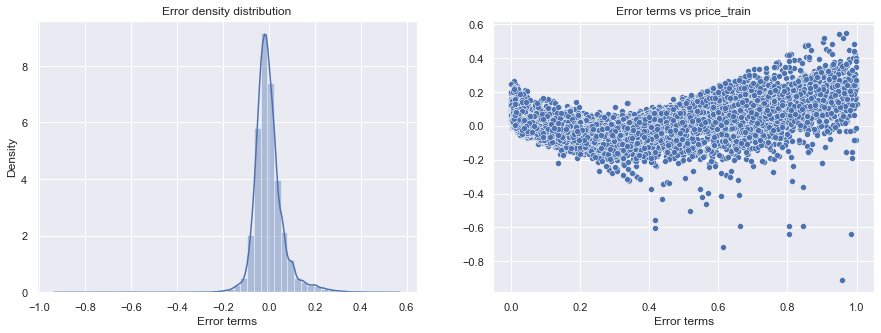

In [202]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.distplot(res,ax=ax1)
plt.title("Error density distribution")
plt.xlabel("Error terms")

ax2 = plt.subplot(122)
sns.scatterplot(x=y_train , y=res , ax=ax2)
plt.title("Error terms vs price_train")
plt.xlabel("Error terms")

plt.show()

Validating linear regression assumptions:

 Insights from above two graphs:
- Errors terms were normally distributed(from left graph 1).
- Errors terms are more or less randomly distrubted with x values.
- Variance is also fine..but for some data points error term's variance is quite high.

## Making Predictions on Test data

In [203]:
df_test.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
52264,0.57,61.5,57.0,2491,5.35,5.32,3.28,0,1,0,...,0,1,0,0,1,0,0,0,0,0
21073,1.16,61.5,55.0,9248,6.75,6.81,4.17,0,1,0,...,1,0,0,0,0,0,1,0,0,0
42161,0.51,63.2,58.0,1284,5.05,5.08,3.20,0,1,0,...,0,0,0,0,0,0,1,0,0,0
35974,0.42,60.6,56.0,921,4.83,4.87,2.94,0,1,0,...,1,0,0,0,0,1,0,0,0,0
7641,0.80,62.6,58.0,4268,5.89,5.93,3.70,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [204]:
df_test[cont] = scaler.transform(df_test[cont])  #scaling the test dataset

In [205]:
df_test[cont].head()

,price,carat,depth,table,x,y,z
52264,0.117046,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948
21073,0.482348,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370
42161,0.051792,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022
35974,0.032167,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764
7641,0.213116,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057


In [206]:
df_test[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
price,16182.0,0.193051,0.213616,0.000433,0.033951,0.111775,0.264908,0.997027
carat,16182.0,0.123801,0.097921,0.000000,0.041580,0.103950,0.174636,0.817048
depth,16182.0,0.520448,0.039478,0.000000,0.500000,0.522222,0.541667,0.811111
table,16182.0,0.278447,0.042969,0.115385,0.250000,0.269231,0.307692,0.634615
x,16182.0,0.533155,0.104117,0.000000,0.438547,0.529795,0.608007,0.931099
y,16182.0,0.097255,0.018843,0.000000,0.080136,0.096774,0.110866,0.167233
z,16182.0,0.438698,0.090182,0.000000,0.361042,0.437965,0.500000,3.945409


## Creating X_test, y_test variables

In [207]:
y_test = df_test["price"]

In [208]:
y_test.head()

52264    0.117046
21073    0.482348
42161    0.051792
35974    0.032167
7641     0.213116
Name: price, dtype: float64

In [209]:
x_test = df_test.drop(["price"],axis=1)

In [210]:
x_test.head()

,carat,depth,table,x,y,z,Good,Ideal,Premium,Very Good,...,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [211]:
x_test_new = x_test[x_vif_4.columns]

In [212]:
x_test_new = sm.add_constant(x_test_new)

In [213]:
x_test_new.head()

,const,carat,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,I,J
52264,1.0,0.076923,0,0,0,0,1,0,0,0,0
21073,1.0,0.199584,0,0,0,1,0,0,0,0,0
42161,1.0,0.064449,0,1,0,0,0,0,0,0,0
35974,1.0,0.045738,0,0,0,1,0,0,0,0,0
7641,1.0,0.124740,1,0,0,0,0,0,0,0,0


In [214]:
y_pred_lm=lm.predict(x_test_new)

In [215]:
x_test_new.shape

(16182, 11)

In [216]:
from sklearn.metrics import r2_score   #regression score function
r2_score(y_true=y_test,y_pred=y_pred_lm)

0.9077776379234881

In [217]:
n=16182
r2=0.907
k=10
Adjusted_R2 = 1 - float((1-r2)*(n-1)/(n-k-1))
print(Adjusted_R2)

0.9069424896419517


### Model Visualization:¶

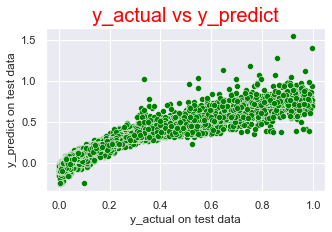

In [255]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test,y=y_pred_lm , color="green")
plt.xlabel("y_actual on test data")
plt.ylabel("y_predict on test data")
plt.title("y_actual vs y_predict",fontdict={"fontsize":20,"fontweight":-0.5,"color":"Red"})
plt.show()

## Business Insights:
### Train set:
- rsquare: 0.91
- adjusted square: 0.90
- Rsqure is 0.91 which tells the corelation between price of diamonds vs different independent varaiables explained by 91%
- If we see the final model:
  - price=-0.3022-0.05(I)-0.10(J)+0.3026(IF)+0.205(Sl1)+0.154(Sl2)+0.257(VS1)+0.241(VS2)+0.284(VVS1)+0.2817(VVS2)+2.27(carat)
  - Co-efficient of the Carat is highest most, which signifies if there is increase of one unit of carat there will increase of 2.27 in price.
  - Next most positive effecting indepenedent variable is IF clarity type variable.
  - Most Negatively effecting parameter is J color type diamonds ,means a loss of 0.10 will occur with increase of one unit of J color type diamonds.
  
### Test set:
- rsquare: 0.907
- Adjusted square: 0.906

### Finally, Our linear model is good as the r-square difference in train & test dataset is less than 5%.

# Comparing with other models

In [224]:
# Imports
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [225]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'Ridge': {
        'model': Ridge()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [226]:
# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [228]:
# Let's try our luck with a bunch of models
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(x_train_new3, y_train)
    models[model]['predictions'] = models[model]['model'].predict(x_test_new)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()
MAE:  0.16223612275948218
MSE:  0.045636736038266304
RMSE:  0.21362756385416726
R2:  -0.00016878505788198161


Running  Ridge()
MAE:  0.044323654819221035
MSE:  0.00420836094956889
RMSE:  0.06487188103923679
R2:  0.907770107518512


Running  LinearRegression()
MAE:  0.04444594030420007
MSE:  0.00420801734446014
RMSE:  0.06486923264892333
R2:  0.9077776379234881


Running  ElasticNet()
MAE:  0.16223612275948218
MSE:  0.045636736038266304
RMSE:  0.21362756385416726
R2:  -0.00016878505788198161


Running  KNeighborsRegressor()
MAE:  0.02331709825014665
MSE:  0.0018869356497919613
RMSE:  0.04343887256584776
R2:  0.9586461631534654


Running  RandomForestRegressor()
MAE:  0.02251946223162467
MSE:  0.0018396226866078558
RMSE:  0.042890822871657006
R2:  0.9596830679151394


Running  GradientBoostingRegressor()
MAE:  0.026564955730261273
MSE:  0.0025182012411053916
RMSE:  0.050181682326376736
R2:  0.9448114283691155


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponen

### Visualize and Analyse The Predictions To Indicate Model Performance

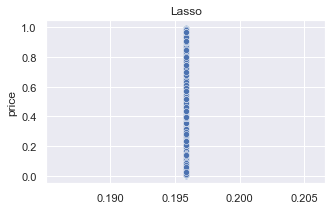

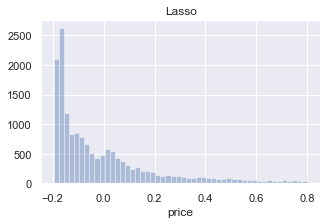

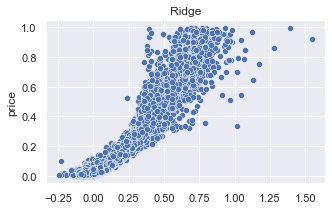

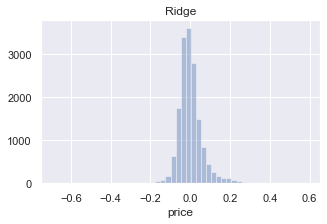

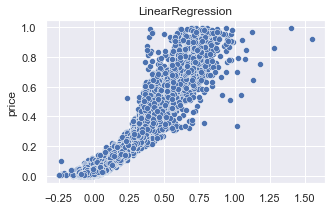

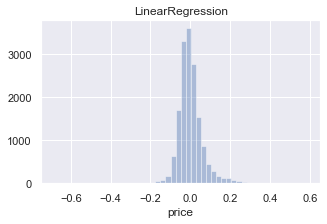

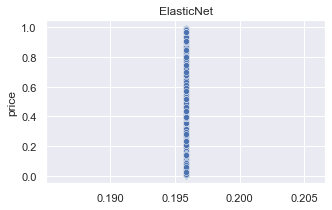

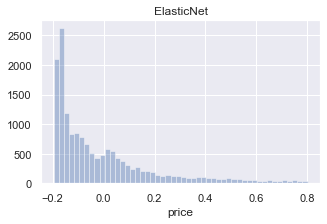

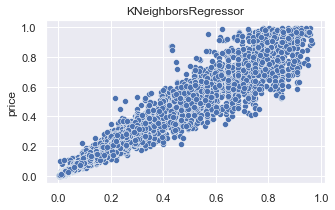

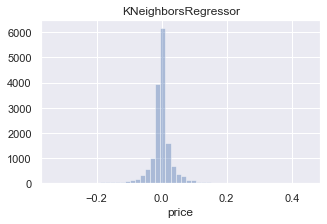

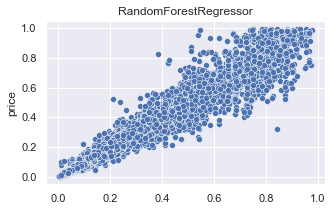

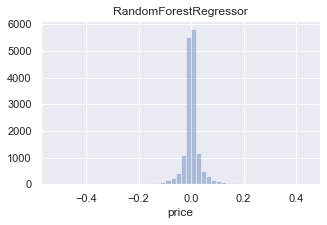

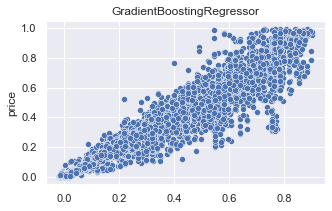

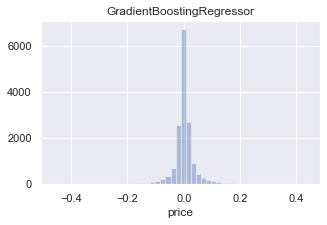

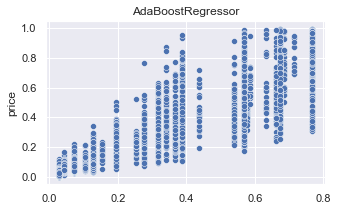

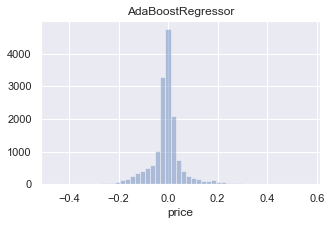

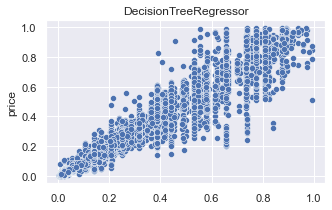

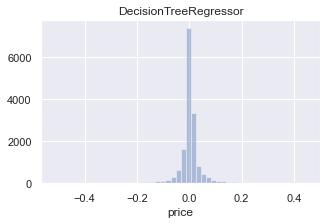

In [277]:
# Analyse the Residuals
for index , model in enumerate(models):
    fig = plt.figure(figsize=(5,3))  
    sns.scatterplot(models[model]["predictions"],y_test).set_title(model)
    fig = plt.figure(figsize=(5,3))
    sns.distplot((y_test - models[model]["predictions"]),kde=False).set_title(model)
    plt.show() 
    